In [1]:
import zfit

# create space
obs = zfit.Space("x", limits=(-10, 10))

# parameters
mu = zfit.Parameter("mu", 1.0, -4, 6)
sigma = zfit.Parameter("sigma", 1.0, 0.1, 10)
lambd = zfit.Parameter("lambda", -0.06, -1, -0.01)
frac = zfit.Parameter("fraction", 0.3, 0, 1)

# model building, pdf creation
gauss = zfit.pdf.Gauss(mu=mu, sigma=sigma, obs=obs)
exponential = zfit.pdf.Exponential(lambd, obs=obs)
model = zfit.pdf.SumPDF([gauss, exponential], fracs=frac)

# data
n_sample = 10000

data = model.create_sampler(n_sample, limits=obs)
data.resample()

# set the values to a start value for the fit
mu.set_value(0.5)
sigma.set_value(1.2)
lambd.set_value(-0.05)
frac.set_value(0.07)

# create NLL
nll = zfit.loss.UnbinnedNLL(model=model, data=data)

# create a minimizer
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(nll)
print(result)

# do the error calculations, here with minos
param_hesse = result.hesse()
param_errors, new_result = result.errors()
print(result.params)

/lustrehome/hdhoang2001/.conda/envs/new/lib/python3.9/site-packages/zfit/__init__.py:37: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn("TensorFlow warnings are by default suppressed by zfit."
/lustrehome/hdhoang2001/.conda/envs/new/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.7.0 and strictly below 2.10.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.5 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the

FitResult of
<UnbinnedNLL model=[<zfit.<class 'zfit.models.functor.SumPDF'>  params=[Composed_autoparam_0, fraction]] data=[<zfit.core.data.Sampler object at 0x7f6d642bf100>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ True    │ True        │ False            │ 2.8e-05 │ 113.9       │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name         value    at limit
--------  --------  ----------
fraction    0.2922       False
mu          0.9681       False
sigma        1.012       False
lambda    -0.06169       False


/lustrehome/hdhoang2001/.conda/envs/new/lib/python3.9/site-packages/zfit/minimizers/fitresult.py:1115: FutureWarning: 'minuit_minos' will be changed as the default errors method to a custom implementationwith the same functionality. If you want to make sure that 'minuit_minos' will be used in the future, add it explicitly as in `errors(method='minuit_minos')`
  warnings.warn("'minuit_minos' will be changed as the default errors method to a custom implementation"


name         value    minuit_hesse         minuit_minos    at limit
--------  --------  --------------  -------------------  ----------
fraction    0.2922     +/-  0.0068  - 0.0068   + 0.0068       False
mu          0.9681     +/-   0.027  -  0.027   +  0.027       False
sigma        1.012     +/-   0.025  -  0.025   +  0.026       False
lambda    -0.06169     +/-  0.0023  - 0.0023   + 0.0022       False


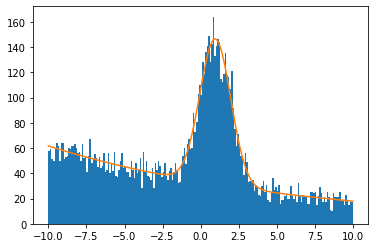

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(data.to_pandas(), bins=200)
range_ = (-10, 10)
mass = np.linspace(*range_, num=200)
pdf_fit = zfit.run(model.pdf(mass))
_ = plt.plot(mass, data.to_pandas().shape[0] / 200 * (range_[1] - range_[0]) * pdf_fit)

/lustrehome/hdhoang2001/.conda/envs/new/lib/python3.9/site-packages/zfit/__init__.py:37: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn("TensorFlow warnings are by default suppressed by zfit."
/lustrehome/hdhoang2001/.conda/envs/new/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.7.0 and strictly below 2.10.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.5 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the

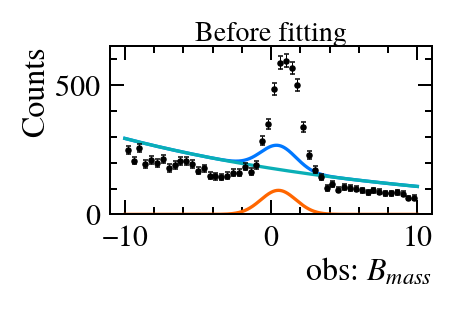

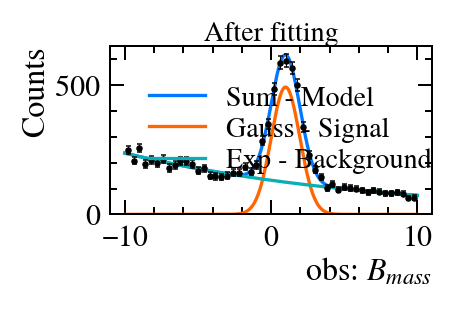

In [1]:

#  Copyright (c) 2022 zfit

import mplhep
import numpy as np

import zfit

mplhep.style.use("LHCb2")
import matplotlib.pyplot as plt

# create space
obs = zfit.Space("x", limits=(-10, 10))

# parameters
mu = zfit.Parameter("mu", 1.0, -4, 6)
sigma = zfit.Parameter("sigma", 1.0, 0.1, 10)
lambd = zfit.Parameter("lambda", -0.06, -1, -0.01)
frac = zfit.Parameter("fraction", 0.3, 0, 1)

# model building, pdf creation
gauss = zfit.pdf.Gauss(mu=mu, sigma=sigma, obs=obs)
exponential = zfit.pdf.Exponential(lambd, obs=obs)
model = zfit.pdf.SumPDF([gauss, exponential], fracs=frac)

# data
n_sample = 10000

exp_data = exponential.sample(n=n_sample * (1 - frac)).numpy()

gauss_data = gauss.sample(n=n_sample * frac).numpy()

data = model.create_sampler(n_sample, limits=obs)
data.resample()

mu.set_value(0.5)
sigma.set_value(1.2)
lambd.set_value(-0.05)
frac.set_value(0.07)

# plot the data
data_np = data[:, 0].numpy()
n_bins = 50

plot_scaling = n_sample / n_bins * obs.area()

x = np.linspace(-10, 10, 1000)


def plot_pdf(title):
    plt.figure()
    plt.title(title)
    y = model.pdf(x).numpy()
    y_gauss = (gauss.pdf(x) * frac).numpy()
    y_exp = (exponential.pdf(x) * (1 - frac)).numpy()
    plt.plot(x, y * plot_scaling, label="Sum - Model")
    plt.plot(x, y_gauss * plot_scaling, label="Gauss - Signal")
    plt.plot(x, y_exp * plot_scaling, label="Exp - Background")
    mplhep.histplot(
        np.histogram(data_np, bins=n_bins),
        yerr=True,
        color="black",
        histtype="errorbar",
    )
    plt.ylabel("Counts")
    plt.xlabel("obs: $B_{mass}$")


# plot the pdf BEFORE fitting
plot_pdf("Before fitting")
# create NLL
nll = zfit.loss.UnbinnedNLL(model=model, data=data)

# create a minimizer
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(nll)

# do the error calculations, here with minos
param_errors, _ = result.errors()

plot_pdf(title="After fitting")
plt.legend()

plt.show()

